In [1]:
# 3.1 Task

In [2]:
# Loading dataset: importing pandas

import pandas as pd

In [3]:
# Loading dataset

df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# Standardize column names

df.columns = df.columns.str.strip().str.replace(' ', '_')

In [5]:
# Converting date columns

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

In [6]:
# Converting month columns

df['Month'] = df['Order_Date'].dt.to_period('M')

In [7]:
# Determining missing values

df.isnull().sum()  

Row_ID              0
Order_ID            0
Order_Date       5841
Ship_Date        5985
Ship_Mode           0
Customer_ID         0
Customer_Name       0
Segment             0
Country             0
City                0
State               0
Postal_Code        11
Region              0
Product_ID          0
Category            0
Sub-Category        0
Product_Name        0
Sales               0
Month            5841
dtype: int64

In [8]:
# Dropping rows with empty order dates

df = df.dropna(subset=['Order_Date'])

In [9]:
# Re-converting to datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce') 

In [10]:
# Recreating Month column

df['Month'] = df['Order_Date'].dt.to_period('M')

In [11]:
# Saving "cleaned" data

df.to_csv('cleaned_sales_data.csv', index=False)

In [12]:
# Preview of "cleaned" data

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,3,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,5,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11


In [13]:
# total sales

total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $872,363.12


In [14]:
# Average Daily Sales

daily_sales = df.groupby('Order_Date')['Sales'].sum()
avg_daily_sales = daily_sales.mean()
print(f"Average Daily Sales: ${avg_daily_sales:,.2f}")

Average Daily Sales: $1,821.22


In [15]:
# Monthly Sales

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

In [16]:
# Seaborn installation

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Emmanuel Cerrer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
#Seaborn installation

import seaborn as sns

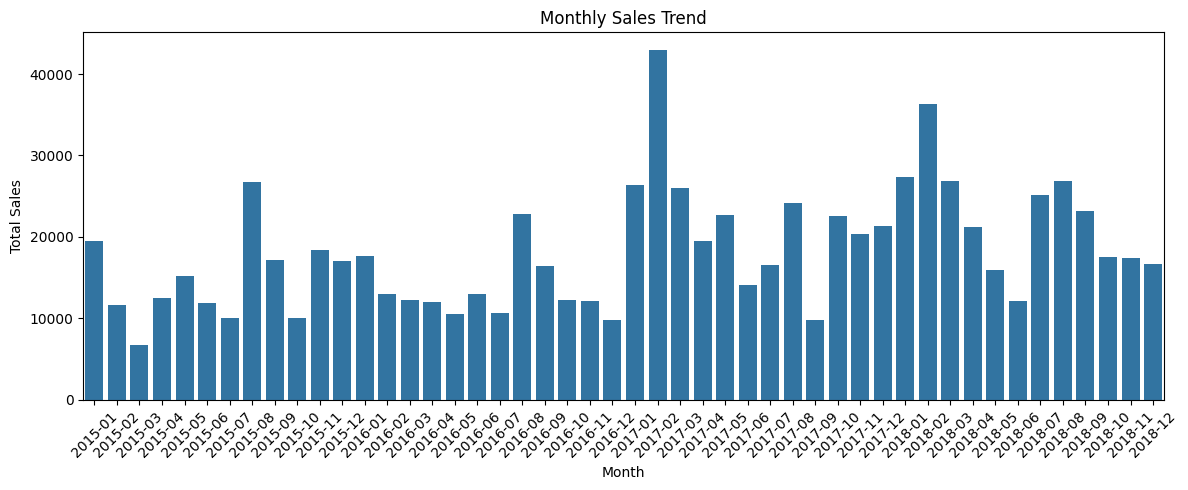

In [18]:
#Monthly Sales Bar Chart

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='Sales', data=monthly_sales)
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [19]:
# Key Insight 1: Sales performance shows significant fluctuations across months, suggesting that product demand varies by period, possibly due to seasonality or market cycles. 
# Key Insight 2: The highest sales were recorded in January 2017, indicating a strong seasonal demand or the success of a major promotional campaign during this time.
# Key Insight 3: Monthly sales attained its lowest drop on February 2015, possibly due to offseason. 


In [22]:
# Aggregating Monthly Sales by Category: Group sales by Category and Month

category_monthly_sales = df.groupby(['Category', 'Month'])['Sales'].sum().reset_index()

# Aggregating Monthly Sales by Category: Result Preview
category_monthly_sales.head()

,Category,Month,Sales
0,Furniture,2015-01,8507.469
1,Furniture,2015-02,1693.850
2,Furniture,2015-03,3574.659
3,Furniture,2015-04,1803.958
4,Furniture,2015-05,2798.821


In [23]:
# Filtering only the 'Furniture' category
furniture_sales = category_monthly_sales[category_monthly_sales['Category'] == 'Furniture']

# Converting Month to datetime (for plotting/modeling)
furniture_sales['Month'] = furniture_sales['Month'].astype(str)
furniture_sales['Month'] = pd.to_datetime(furniture_sales['Month'])

# Setting Month as index (required for ARIMA)
furniture_sales.set_index('Month', inplace=True)

# Sorting and Previewing
furniture_sales = furniture_sales.sort_index()
furniture_sales.head()

C:\Users\Emmanuel Cerrer\AppData\Local\Temp\ipykernel_37788\3449592627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_sales['Month'] = furniture_sales['Month'].astype(str)
C:\Users\Emmanuel Cerrer\AppData\Local\Temp\ipykernel_37788\3449592627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_sales['Month'] = pd.to_datetime(furniture_sales['Month'])


,Category,Sales
Month,,
2015-01-01,Furniture,8507.469
2015-02-01,Furniture,1693.850
2015-03-01,Furniture,3574.659
2015-04-01,Furniture,1803.958
2015-05-01,Furniture,2798.821


In [25]:
# Time Series Data Preparation - Focusing only on 'Furniture' category
furniture_sales = category_monthly_sales[category_monthly_sales['Category'] == 'Furniture'].copy()

# Time Series Data Preparation - Converting 'Month' to datetime and sort
furniture_sales['Month'] = pd.to_datetime(furniture_sales['Month'].astype(str))
furniture_sales = furniture_sales.sort_values('Month')

# Time Series Data Preparation - Setting 'Month' as index
furniture_sales.set_index('Month', inplace=True)

# Time Series Data Preparation - Finalizing series for modeling
furniture_ts = furniture_sales['Sales']
furniture_ts.head()

Month
2015-01-01    8507.469
2015-02-01    1693.850
2015-03-01    3574.659
2015-04-01    1803.958
2015-05-01    2798.821
Name: Sales, dtype: float64

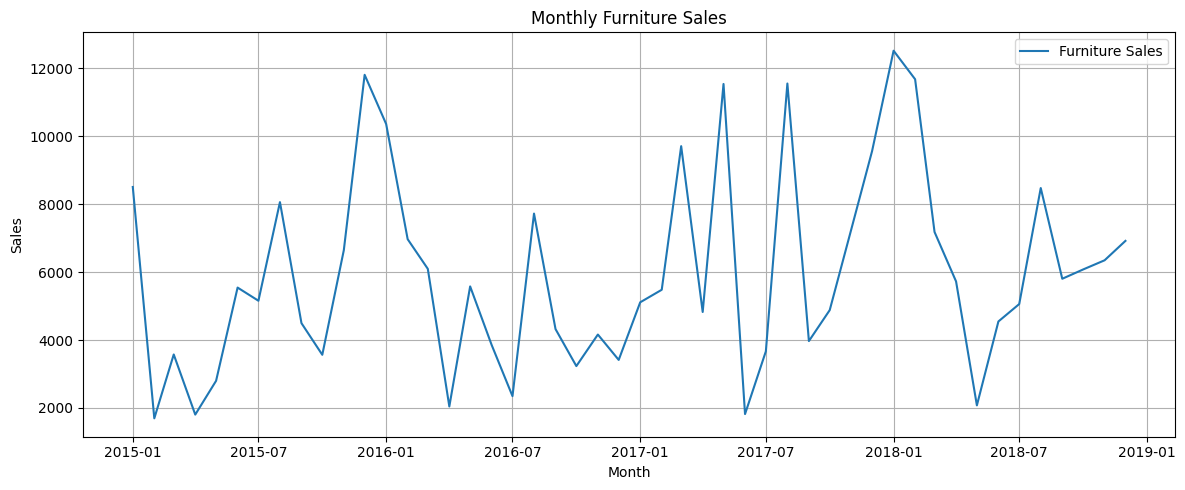

In [26]:
# Time Series Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(furniture_ts, label='Furniture Sales')
plt.title('Monthly Furniture Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Building ARIMA Forecasting Model

from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model (order p=1, d=1, q=1 as a simple start)
model = ARIMA(furniture_ts, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting 3 months ahead
forecast = model_fit.forecast(steps=3)
print("3-Month Forecast:\n", forecast)

C:\Users\Emmanuel Cerrer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Emmanuel Cerrer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Emmanuel Cerrer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3-Month Forecast:
 2019-01-01    6449.196428
2019-02-01    6338.741275
2019-03-01    6312.824436
Freq: MS, Name: predicted_mean, dtype: float64


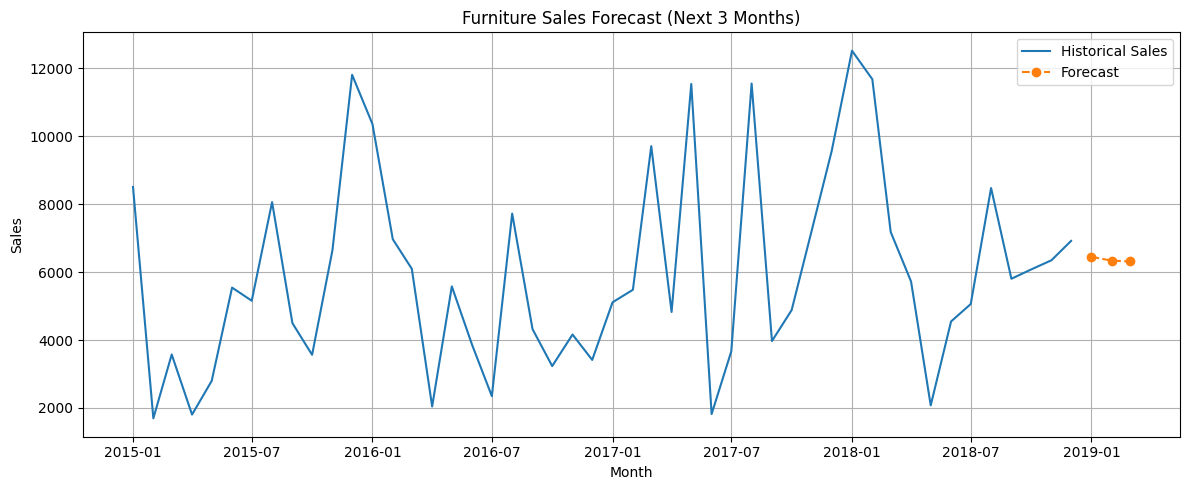

In [28]:
# Plotting forecast vs. historical
plt.figure(figsize=(12, 5))
plt.plot(furniture_ts, label='Historical Sales')
forecast_index = pd.date_range(start=furniture_ts.index[-1] + pd.offsets.MonthBegin(1), periods=3, freq='MS')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Furniture Sales Forecast (Next 3 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Key Insight 1: Historical trends from 2015 to 2018 show fluctuations in furniture sales, suggesting seasonality in demand.
# Key Insight 2: Forecasted sales for January to March 2019 show a slight downward trend, indicating a potential softening in demand.
# Key Insight 3: Compared to the historical volatility, the forecast appears more stable, although at a slightly lower level.

In [32]:
# Train-test split: Last 3 months as test, rest as train

train = furniture_ts[:-3]  # up to Dec 2018
test = furniture_ts[-3:]  # Jan, Feb, Mar 2019

In [33]:
# Fitting ARIMA model on training data

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\Emmanuel Cerrer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Emmanuel Cerrer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Emmanuel Cerrer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
# Forecasting the next 3 months

forecast = model_fit.forecast(steps=3)

In [35]:
# Comparing with actual test values

print("Actual Sales:\n", test.values)
print("Forecasted Sales:\n", forecast.values)

Actual Sales:
 [6077.75  6348.638 6919.946]
Forecasted Sales:
 [6142.33668494 6221.83851495 6240.54810003]


In [36]:
# Evaluating Accuracy

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test.values, forecast)
rmse = np.sqrt(mean_squared_error(test.values, forecast))

print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

#Forecast Accuracy
##**MAE** and **RMSE** were calculated to evaluate the forecast's precision over the 3-month test period.
##These metrics indicate how closely the ARIMA model’s forecasts aligned with actual sales values.

MAE (Mean Absolute Error): 290.26
RMSE (Root Mean Squared Error): 400.76


In [ ]:
# Q1. How did you set up the 3-month forecast and what train-test split did you use?
## A1. Monthly sales were aggregated by category, with specific focus applied to Furniture. The ARIMA model was used to forecast the next 3 months of sales. To evaluate the model, the last 3 months of the dataset were used as the test set, while the rest of the data served as the training set.

# Q2. One-step vs. multi-step forecasting?
## A2. The ARIMA model applied here performs multi-step forecasting, generating three months of future predictions in one sequence. While this can cause error accumulation across time steps, it is suitable for short-term projections and rapid business planning cycles.

# Q3. Model performance & accuracy metrics?
## A3. The model’s accuracy was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). The results were: 290.26 (MAE) and 400.76 (RSME).
## A3. (Cont.) These values suggest that the forecasted sales values are relatively close to the actual observed sales, indicating a reasonable prediction accuracy given the simplicity of the model and the limited forecasting horizon. 